# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [4]:
import pandas as pd
import numpy as np
import cv2
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [5]:
#implement elbow method from scratch
def elbow(n_clusters_range,X_test,y):
    avg_distance = []
    for k in n_clusters_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X_test)
        avg_distance.append(kmeans.inertia_ / X.shape[0])

    # Plot the elbow curve
    plt.plot(n_clusters_range, avg_distance, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Distance from Centroids')
    plt.title('Elbow Curve')
    plt.show()

In [6]:
#implement silhouette method from scratch
def silhouette(n_clusters_range,X,y):
    silhouette_scores = []
    for k in n_clusters_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2000)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    # Plot the silhouette curve
    plt.plot(n_clusters_range, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Curve')
    plt.show()
    return silhouette_scores


In [7]:
# LOADING THE DATASET. Take only the test split (10000 samples)
from keras.datasets import fashion_mnist
import numpy as np

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)



10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


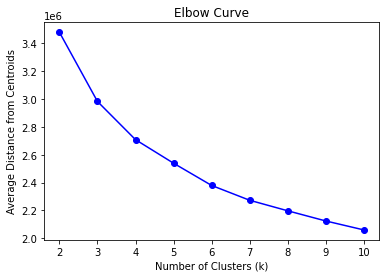

In [8]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)
n_clusters_range = range(2, 11,1)
el = elbow(n_clusters_range,X,y)

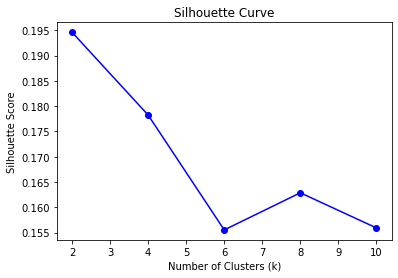

In [9]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)
n_clusters_range = range(2,11,2)
sh = silhouette(n_clusters_range,X,y)

In [10]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)

In [11]:
print(X.transpose()[0].shape,y.shape)
p=[]
for i in X:
  p.append(sum(i)/len(i))
p = np.array(p)

(10000,) (10000,)


In [12]:
p.shape

(10000,)

Text(0.5, 1.0, 'Scatter Plot of x and y')

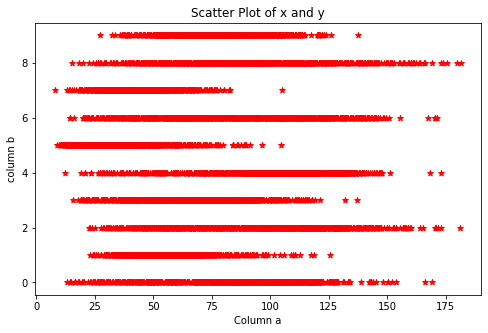

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(p, y, c='r', marker='*')
plt.xlabel('Column a')
plt.ylabel('column b')
plt.title('Scatter Plot of x and y')

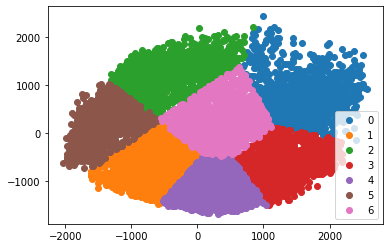

In [14]:
#Transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(2)
df = pca.fit_transform(X)
# pca = PCA(n_components = 2)
# X_principal = pca.fit_transform(X_normalized)
# X_principal = pd.DataFrame(X_principal)
# X_principal.columns = ['P1', 'P2']
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 7)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
# plt.figure(figsize=(32,20))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1],label=i)
plt.legend()
plt.show()

[0 1 2 3 4 5 6 7 8 9]


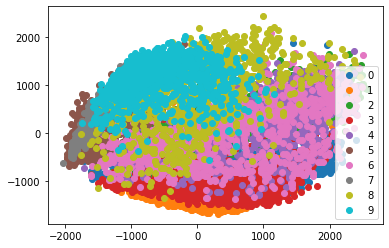

In [15]:
u_labels = np.unique(y)
print(u_labels)
#plotting the results:
# plt.figure(figsize=(8,5))
for i in u_labels:
    plt.scatter(df[y == i , 0] , df[y == i , 1],label =i)
plt.legend()
plt.show()

In [16]:
# metrics.accuracy_score(label,y)

## Part2: Hierarchical clustering

In [17]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering():
  ac2 = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
  ac3 = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
  return ac2,ac3


In [18]:
df = pd.DataFrame(df,columns=['P1','P2']) 
def visualize(ac):
  plt.figure(figsize =(4, 4))
  plt.scatter(df['P1'], df['P2'],
      c = ac.fit_predict(X), cmap ='rainbow')
  plt.show()

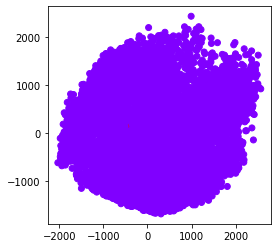

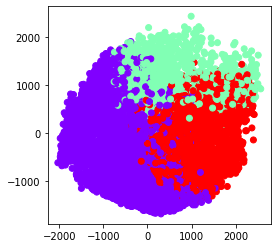

In [19]:
ac2 ,ac3 = hierarchical_clustering()
visualize(ac2)
visualize(ac3)

In [20]:
#visualize a dendogram

def dendogram():
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  linked = linkage(X_scaled, method='ward')
  plt.figure(figsize=(10, 7))
  dendrogram(linked, truncate_mode='lastp', p=50)
  plt.title('Dendrogram-ward')
  plt.xlabel('Samples')
  plt.ylabel('Distance')
  plt.show()
  linked = linkage(X_scaled, method='single')
  plt.figure(figsize=(10, 7))
  dendrogram(linked, truncate_mode='lastp', p=50)
  plt.title('Dendrogram-Single')
  plt.xlabel('Samples')
  plt.ylabel('Distance')
  plt.show()
  linked = linkage(X_scaled, method='complete')
  plt.figure(figsize=(10, 7))
  dendrogram(linked, truncate_mode='lastp', p=50)
  plt.title('Dendrogram-Complete')
  plt.xlabel('Samples')
  plt.ylabel('Distance')
  plt.show()
  return

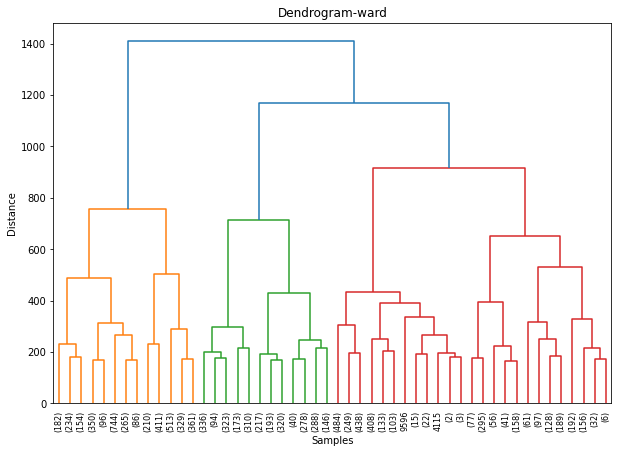

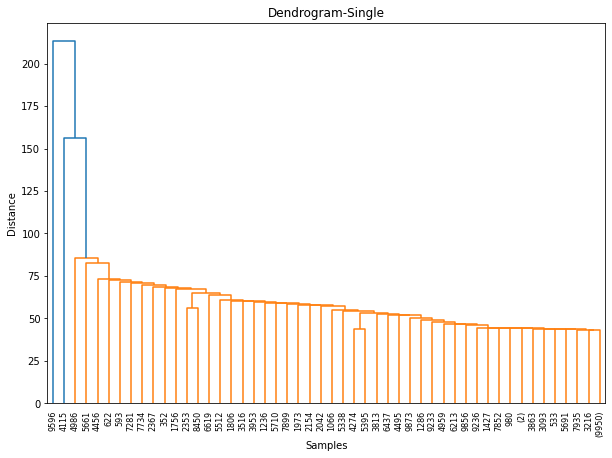

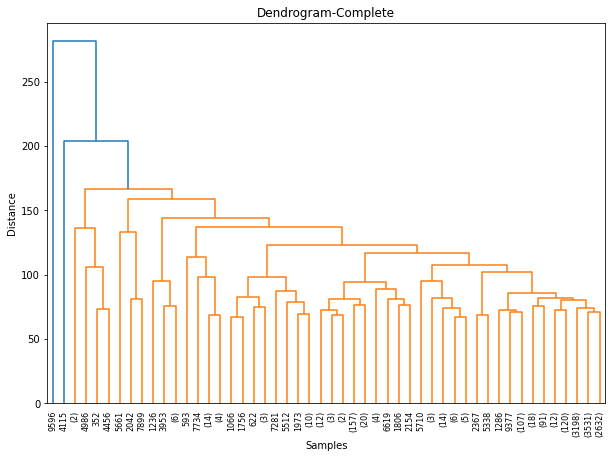

In [21]:
dendogram()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
</br>
</br>
</br>





**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
Single Linkage is a method that focused on minimum distances or nearest neighbor between clusters meanwhile Complete Linkage concentrates on maximum distance or furthest neighbor between clusters.

## Part3: Image Compression

In [35]:
def compress_image(img,img_size,X,k):
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    compressed_pixel_array = centroids[labels]
    compressed_image_array = compressed_pixel_array.reshape((img_size[0], img_size[1], img_size[2]))
    compressed_image = Image.fromarray(np.uint8(compressed_image_array))

    # Calculate the data reduction
    original_size = img_size[0] * img_size[1] * img_size[2] * 8
    compressed_size = k * 24 + img_size[0] * img_size[1] * np.ceil(np.log2(k))
    reduction = (1 - compressed_size / original_size) * 100
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img)
    axs[0].set_title('Original')
    axs[1].imshow(compressed_image)
    axs[1].set_title('Compressed')
    plt.show()
    # Return the compressed image and the data reduction
    return compressed_image, reduction

In [36]:
# Boiler plate code
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])


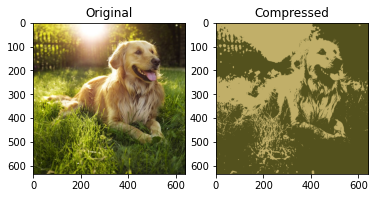

In [39]:
image,r = compress_image(img,img_size,X,2)

In [40]:
print(f"Data reduction: {r:.2f}%")

Data reduction: 95.83%
